# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    - import Foursquare data
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - Spatail join by Census Tract
    - merges topologies
    - map topologies
    - map Businesses
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [271]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'Polygon', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

# Foursquare Data
- import Foursquare data

In [272]:
data = gpd.read_file('NYU_March2018_subset30.geojson')

In [273]:
X_dummies = data[list(data.columns)[-4:-1]]
print(X_dummies.shape)
X_dummies = pd.get_dummies(X_dummies)
Fq_dummies = pd.concat([data, X_dummies], axis=1, join='inner')  
Fq_dummies.shape

(106287, 3)


(106287, 716)

# Census Tract shapefile
- imports the Census Tract shapefile


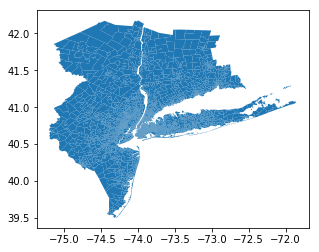

In [274]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()

In [275]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [276]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

# Typologies
- import Typologies
- merges topologies
- map topologies

In [277]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)

In [278]:
Typologiesgdp['Type_1.19'].unique()

array(['VHI - Super Gentrification or Exclusion',
       'MHI - Ongoing Exclusion',
       'MHI - Stable or Early Stage of Exclusion',
       'MHI - Advanced Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'LI - Not Losing Low-Income Households',
       'LI - Ongoing Displacement of Low-Income Households',
       'Missing Data', 'LI - Ongoing Gentrification', nan], dtype=object)

In [279]:
Typologiesgdp['Ongoing_adv_gent'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['Ongoing_adv_gent'].replace('VHI - Super Gentrification or Exclusion',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Ongoing Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Stable or Early Stage of Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Advanced Exclusion', 0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Advanced Gentrification',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - At Risk of Gentrification',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Ongoing Gentrification',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Not Losing Low-Income Households',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Ongoing Displacement of Low-Income Households',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('Missing Data',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace(nan,0,inplace=True)


In [280]:
Typologiesgdp['Ongoing_adv_gent'].value_counts().sum()

5298

In [281]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)

# Karen's Typologies

In [282]:
Typvariant=pd.read_csv('NY gentrification dependent variables.csv')
Typvariant = gpd.GeoDataFrame(Typvariant)
len(Typvariant.columns), Typvariant.shape
# Typologiesgdp.drop(columns=['Type_1.19'], inplace=True)
Typvariant.head()
print(Typvariant.columns)
Typvariant.rename(columns={'geoid':'GEOID'},inplace=True)
Typologiesgdp = Typologiesgdp.drop(columns = ['gent00_16', 'gent90_00']).merge(Typvariant, on= 'GEOID')
Typvariant.isnull().sum()


Index(['geoid', 'gent90_00', 'gent00_16', 'Supergent16'], dtype='object')


GEOID            0
gent90_00       75
gent00_16       75
Supergent16    102
dtype: int64

In [283]:
# Typologiesgdp

# NEW BINARY TYPOLOGIES

In [308]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','medrent00','medrent16',
            'medhval00','medhval16','hinc00','hinc16','pct_ch_hinc00_16',
           'gent00_16', 'gent90_00','Supergent16','Ongoing_adv_gent']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typ_Bin = Typologiesgdp.loc[:,cols_typ].copy()
Typ_Bin.head()


<class 'numpy.float64'>


,GEOID,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,pct_ch_hinc00_16,gent00_16,gent90_00,Supergent16,Ongoing_adv_gent
0,9.001010e+09,1601.0,1510.0,1000001.0,1494000.0,273976.05,150655.0,-0.450116,0.0,0.0,1.0,1.0
1,9.001010e+09,1244.0,1628.0,1000000.0,2000000.0,290000.00,250000.0,-0.137931,0.0,0.0,0.0,1.0
2,9.001010e+09,833.0,2113.0,1000000.0,2000000.0,290000.00,212448.0,-0.267421,0.0,0.0,0.0,1.0
3,9.001010e+09,1791.0,2250.0,769300.0,1459900.0,157543.95,187875.0,0.192524,0.0,0.0,0.0,1.0
4,9.001010e+09,1967.0,1900.0,1000001.0,2000001.0,246540.60,221250.0,-0.102582,0.0,0.0,0.0,1.0


In [309]:
Typ_Bin.pct_ch_hinc00_16= Typ_Bin.pct_ch_hinc00_16.replace(nan,Typ_Bin.pct_ch_hinc00_16.mean())
Typ_Bin.medhval00= Typ_Bin.medhval00.replace(nan,Typ_Bin.medhval00.mean())
Typ_Bin.medhval16= Typ_Bin.medhval16.replace(nan,Typ_Bin.medhval16.mean())
Typ_Bin.medrent00= Typ_Bin.medrent00.replace(nan,Typ_Bin.medrent00.mean())
Typ_Bin.medrent16= Typ_Bin.medrent16.replace(nan,Typ_Bin.medrent16.mean())

Typ_Bin.medhval00= Typ_Bin.medhval00.replace(0,Typ_Bin.medhval00.mean())
Typ_Bin.medhval16= Typ_Bin.medhval16.replace(0,Typ_Bin.medhval16.mean())
Typ_Bin.medrent00= Typ_Bin.medrent00.replace(0,Typ_Bin.medrent00.mean())
Typ_Bin.medrent16= Typ_Bin.medrent16.replace(0,Typ_Bin.medrent16.mean())

print(Typ_Bin.medrent16.isnull().sum())
print(Typ_Bin.medrent16.describe())
print(Typ_Bin.medhval16.isnull().sum())
print(Typ_Bin.medhval16.describe())
print(Typ_Bin.medrent00.isnull().sum())
print(Typ_Bin.medrent00.describe())
print(Typ_Bin.medhval00.isnull().sum())
print(Typ_Bin.medhval00.describe())

0
count    5294.000000
mean     1428.989658
std       459.131843
min        99.000000
25%      1166.000000
50%      1366.500000
75%      1600.000000
max      3501.000000
Name: medrent16, dtype: float64
0
count    5.294000e+03
mean     4.621984e+05
std      2.599954e+05
min      2.310000e+04
25%      2.987000e+05
50%      4.168000e+05
75%      5.507750e+05
max      2.000001e+06
Name: medhval16, dtype: float64
0
count    5294.000000
mean      843.613407
std       281.426254
min       175.000000
25%       689.000000
50%       795.000001
75%       942.000000
max      2001.000000
Name: medrent00, dtype: float64
0
count    5.294000e+03
mean     2.205722e+05
std      1.257103e+05
min      9.999000e+03
25%      1.513000e+05
50%      1.941000e+05
75%      2.527750e+05
max      1.000001e+06
Name: medhval00, dtype: float64


In [310]:
# CREATE
Typ_Bin['pct_ch_medhval00_16'] = (Typ_Bin.medhval16-Typ_Bin.medhval00)/Typ_Bin.medhval00
Typ_Bin['pct_ch_medrent00_16'] = (Typ_Bin.medrent16-Typ_Bin.medrent00)/Typ_Bin.medrent00

In [311]:
# CLEAN
# ALL TO SAME SIZE

In [312]:
Typ_Bin =Typ_Bin.dropna(how='all',axis=0)
print(Typ_Bin.shape)
Typ_Bin = Typ_Bin.dropna(axis=0)
print(Typ_Bin.shape)
cols_X = [i for i in Typ_Bin.columns] #if (i != 'pct_ch_hinc00_16')&(i != 'GEOID')]
print(cols_X)

(5294, 14)
(5178, 14)
['GEOID', 'medrent00', 'medrent16', 'medhval00', 'medhval16', 'hinc00', 'hinc16', 'pct_ch_hinc00_16', 'gent00_16', 'gent90_00', 'Supergent16', 'Ongoing_adv_gent', 'pct_ch_medhval00_16', 'pct_ch_medrent00_16']


In [313]:
# # Explore 
      
# plt.figure(1)
# plt.subplot(3,1,3)
# Typ_Bin.pct_ch_hinc00_16.hist(ax=plt.gca(), figsize = (20,15))
# plt.subplot(3,1,1)
# Typ_Bin.pct_ch_medhval00_16.hist(ax=plt.gca()) #no need to specify for first axis
# plt.subplot(3,1,2)
# Typ_Bin.pct_ch_medrent00_16.hist(ax=plt.gca())
# Typ_Bin.pct_ch_medrent00_16.hist(ax=plt.gca())

In [314]:
print(Typ_Bin.pct_ch_medhval00_16.isnull().sum())
print(Typ_Bin.pct_ch_medhval00_16.describe())
print(Typ_Bin.pct_ch_medrent00_16.isnull().sum())
print(Typ_Bin.pct_ch_medrent00_16.describe())

0
count    5178.000000
mean        1.281832
std         2.143959
min        -0.735748
25%         0.754896
50%         0.972684
75%         1.347877
max        47.134813
Name: pct_ch_medhval00_16, dtype: float64
0
count    5178.000000
mean        0.749132
std         0.544095
min        -0.934783
25%         0.516336
50%         0.697070
75%         0.892620
max        19.000000
Name: pct_ch_medrent00_16, dtype: float64


In [315]:
Typ_Bin['pct_ch_medhval00_16_binary'] = (Typ_Bin.pct_ch_medhval00_16> Typ_Bin.pct_ch_medhval00_16.std())
print((Typ_Bin.pct_ch_medhval00_16_binary> Typ_Bin.pct_ch_medhval00_16_binary.std()).sum())
print((Typ_Bin.pct_ch_medhval00_16_binary> Typ_Bin.pct_ch_medhval00_16_binary.std()).sum()/len(mergedgpd))
Typ_Bin.pct_ch_medhval00_16_binary.replace(False,0, inplace=True)
Typ_Bin.pct_ch_medhval00_16_binary.replace(True,1, inplace=True)
Typ_Bin.pct_ch_medhval00_16_binary  = pd.to_numeric(Typ_Bin.pct_ch_medhval00_16_binary)

407
0.0782241014799


In [367]:
Typ_Bin.pct_ch_medrent00_16.std(),Typ_Bin.pct_ch_medhval00_16.std()

(0.5440950790515908, 2.14395929962014)

In [316]:
Typ_Bin['pct_ch_medrent00_16_binary'] = (Typ_Bin.pct_ch_medrent00_16> Typ_Bin.pct_ch_medrent00_16.std())
print((Typ_Bin.pct_ch_medrent00_16_binary> Typ_Bin.pct_ch_medrent00_16_binary.std()).sum())
print((Typ_Bin.pct_ch_medrent00_16_binary> Typ_Bin.pct_ch_medrent00_16_binary.std()).sum()/len(Typ_Bin))
Typ_Bin.pct_ch_medrent00_16_binary.replace(False,0, inplace=True)
Typ_Bin.pct_ch_medrent00_16_binary.replace(True,1, inplace=True)
Typ_Bin.pct_ch_medrent00_16_binary  = pd.to_numeric(Typ_Bin.pct_ch_medrent00_16_binary)

3705
0.715527230591


In [317]:
Typ_Bin['pct_ch_hinc00_16_binary'] = (Typ_Bin.pct_ch_hinc00_16> Typ_Bin.pct_ch_hinc00_16.std())

print((Typ_Bin.pct_ch_hinc00_16_binary> Typ_Bin.pct_ch_hinc00_16_binary.std()).sum())
print((Typ_Bin.pct_ch_hinc00_16_binary> Typ_Bin.pct_ch_hinc00_16_binary.std()).sum()/len(mergedgpd))
Typ_Bin.pct_ch_hinc00_16_binary.replace(False,0, inplace=True)
Typ_Bin.pct_ch_hinc00_16_binary.replace(True,1, inplace=True)
Typ_Bin.pct_ch_hinc00_16_binary  = pd.to_numeric(Typ_Bin.pct_ch_hinc00_16_binary)

501
0.096290601576


# Visualize ALL

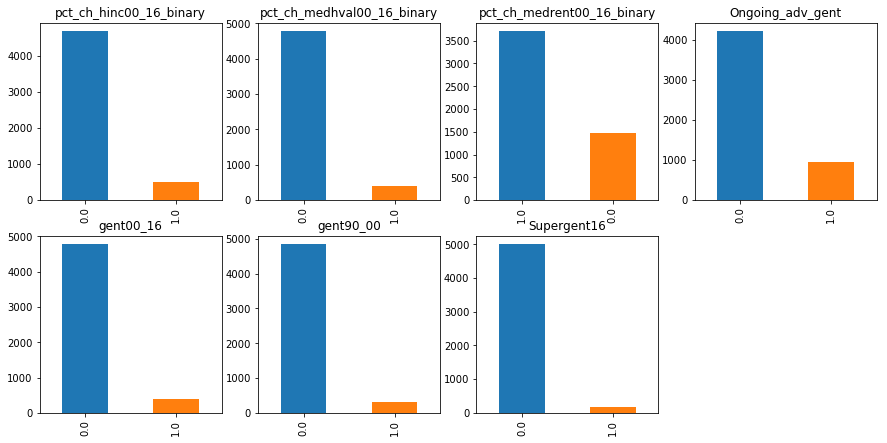

In [329]:
bin_typs = ['pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Typ_Bin[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Typ_Bin[column].value_counts()/Typ_Bin[column].value_counts().sum()

In [352]:
# print(column)
# Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]]


157.0

In [373]:
matches = {}
for i, column_1 in enumerate(bin_typs):
    matches[column_1] = []
    for k, column_2 in enumerate(bin_typs):
#         if i == k:
#             continue
#         else:
        matches[column_1].append(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count())
        print(column_1+' matches with '+column_2+'\t\t\t'+str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count())+' times')
pd.DataFrame(matches).corr()

pct_ch_hinc00_16_binary matches with pct_ch_hinc00_16_binary			5178 times
pct_ch_hinc00_16_binary matches with pct_ch_medhval00_16_binary			4584 times
pct_ch_hinc00_16_binary matches with pct_ch_medrent00_16_binary			1920 times
pct_ch_hinc00_16_binary matches with Ongoing_adv_gent			4012 times
pct_ch_hinc00_16_binary matches with gent00_16			4362 times
pct_ch_hinc00_16_binary matches with gent90_00			4517 times
pct_ch_hinc00_16_binary matches with Supergent16			4533 times
pct_ch_medhval00_16_binary matches with pct_ch_hinc00_16_binary			4584 times
pct_ch_medhval00_16_binary matches with pct_ch_medhval00_16_binary			5178 times
pct_ch_medhval00_16_binary matches with pct_ch_medrent00_16_binary			1824 times
pct_ch_medhval00_16_binary matches with Ongoing_adv_gent			4008 times
pct_ch_medhval00_16_binary matches with gent00_16			4380 times
pct_ch_medhval00_16_binary matches with gent90_00			4617 times
pct_ch_medhval00_16_binary matches with Supergent16			4603 times
pct_ch_medrent00_16_binar

,Ongoing_adv_gent,Supergent16,gent00_16,gent90_00,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary
Ongoing_adv_gent,1.000000,0.890132,0.936432,0.906747,0.765304,0.774064,-0.921383
Supergent16,0.890132,1.000000,0.970113,0.965725,0.929915,0.943559,-0.995123
gent00_16,0.936432,0.970113,1.000000,0.933267,0.879400,0.887043,-0.981930
gent90_00,0.906747,0.965725,0.933267,1.000000,0.921337,0.940247,-0.975388
pct_ch_hinc00_16_binary,0.765304,0.929915,0.879400,0.921337,1.000000,0.947698,-0.928785
pct_ch_medhval00_16_binary,0.774064,0.943559,0.887043,0.940247,0.947698,1.000000,-0.942764
pct_ch_medrent00_16_binary,-0.921383,-0.995123,-0.981930,-0.975388,-0.928785,-0.942764,1.000000


In [339]:
merged = NYCzip.merge(Typ_Bin,on='GEOID')
list(merged.columns)
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (5178, 18)


(5178, 18)

In [ ]:
for i, column_1 in enumerate(bin_typs):
    print('-----------------------------------------------------------------------------')
    print('Blank areas shows point were typologies do not match')
    print(column_1+ ' MATCHES')
    plt.figure(i)
    for k, column_2 in enumerate(bin_typs):
        if i == k:
            continue
        else:
            
            ax = plt.subplot(4,4,k+1)
            mergedgpd[mergedgpd[column_1] /
                      == mergedgpd[column_2]].plot(column=column_1,title=column_1+/
                                                   ' matches with '+column_2+' at:'legend = True,figsize=(5, 5), ax=ax)
            plt.show()

In [359]:
cols_typ = bin_typs+ ['GEOID']
output_mergedgpd = mergedgpd.loc[:,cols_typ].copy()


In [360]:
output_mergedgpd.to_csv('NEW_5_BINARIES.csv')

In [363]:
print(output_mergedgpd.shape)
output_mergedgpd.tail()

(5178, 8)


,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
5173,1.0,1.0,1.0,0.0,0.0,0.0,0.0,36061021400
5174,1.0,0.0,1.0,1.0,0.0,1.0,0.0,36061021800
5175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36061021900
5176,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36061022102
5177,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36047152200


In [ ]:
# END OF TYPOLOGIES DEFINITION

# Spatail Join
- Spatail join by Census Tract
- map Businesses


In [81]:
mergedgpd.crs, data.crs, mergedgpd.shape, data.shape

(None, {'init': 'epsg:4326'}, (5290, 4), (106287, 11))

In [82]:
mergedgpd.crs = {'init' :'epsg:4326'}

In [83]:
mergedgpd.crs

{'init': 'epsg:4326'}

In [84]:
data_sjoined = gpd.sjoin(mergedgpd.drop(columns='pct_ch_hinc00_16_0_15'),Fq_dummies, op="contains")

In [85]:
list(data_sjoined.columns)

['GEOID',
 'geometry',
 'pct_ch_hinc00_16',
 'index_right',
 'id',
 'Place Name',
 'Rating',
 'Checkins',
 'Users',
 'Visits',
 'Pricing',
 'Type',
 'Category',
 'Class',
 'Type_ATM',
 'Type_Accessories Store',
 'Type_Acupuncturist',
 'Type_Adult Boutique',
 'Type_Adult Education Center',
 'Type_Advertising Agency',
 'Type_Afghan Restaurant',
 'Type_African Restaurant',
 'Type_Airport',
 'Type_Airport Food Court',
 'Type_Airport Gate',
 'Type_Airport Lounge',
 'Type_Airport Service',
 'Type_Airport Terminal',
 'Type_Airport Tram',
 'Type_Alternative Healer',
 'Type_American Restaurant',
 'Type_Amphitheater',
 'Type_Animal Shelter',
 'Type_Antique Shop',
 'Type_Apres Ski Bar',
 'Type_Aquarium',
 'Type_Arcade',
 'Type_Arepa Restaurant',
 'Type_Argentinian Restaurant',
 'Type_Art Gallery',
 'Type_Art Museum',
 'Type_Art Studio',
 'Type_Arts & Crafts Store',
 'Type_Arts & Entertainment',
 'Type_Asian Restaurant',
 'Type_Assisted Living',
 'Type_Astrologer',
 'Type_Athletics & Sports',
 'Ty

In [86]:
data_sjoined_sum = data_sjoined.groupby(by='GEOID').sum()
print(data_sjoined_sum.shape,data_sjoined_sum.columns)
data_sjoined_sum_merged = data_sjoined_sum.merge(mergedgpd.loc[:,['GEOID','pct_ch_hinc00_16_0_15', 'geometry']],on='GEOID')
print(data_sjoined_sum_merged.shape,data_sjoined_sum_merged.columns)
data_sjoined_sum_merged = gpd.GeoDataFrame(data_sjoined_sum_merged)
print(data_sjoined_sum_merged.shape,data_sjoined_sum_merged.columns)

(3009, 711) Index(['pct_ch_hinc00_16', 'index_right', 'Rating', 'Checkins', 'Users',
       'Visits', 'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object', length=711)
(3009, 714) Index(['GEOID', 'pct_ch_hinc00_16', 'index_right', 'Rating', 'Checkins',
       'Users', 'Visits', 'Type_ATM', 'Type_Accessories Store',
       'Type_Acupuncturist',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'pct_ch_hinc00_16_0_15', 'geometry'],
      dtype='object', length=714)
(3009, 714) Index(['GEOID', 'pct_ch_hinc00_16', 'index_right', 'Rating', 'Checkins',
       'Users', '

In [87]:
Fq_dummies.shape,data_sjoined_sum.shape, len(data_sjoined_sum_merged.GEOID.unique())

((106287, 716), (3009, 711), 3009)

In [88]:
data_sjoined_sum_merged.columns
data_sjoined_sum_merged.drop(columns= 'index_right',inplace=True)

In [89]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'pct_ch_hinc00_16', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'pct_ch_hinc00_16_0_15', 'geometry'],
      dtype='object', length=713)

In [90]:
data_sjoined_sum_merged.rename(columns={"pct_ch_hinc00_16_0_15": "Typologies"}, inplace = True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


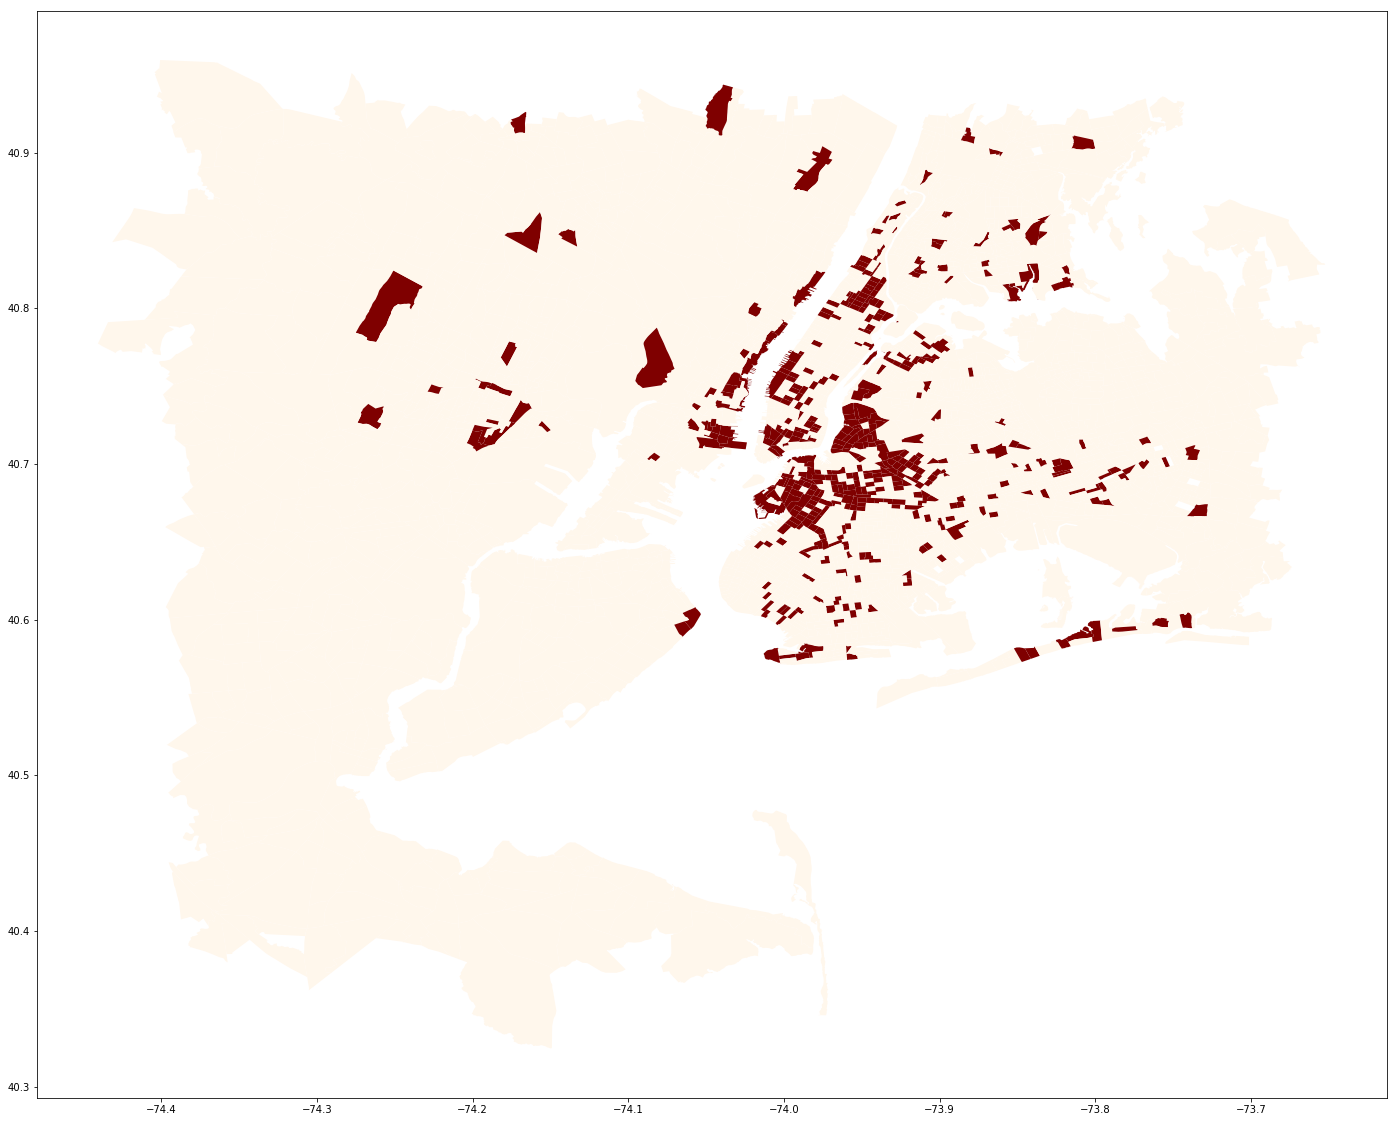

In [91]:
plt.rcParams['figure.figsize'] = (30, 20)
ax = data_sjoined_sum_merged.plot(column='Typologies', scheme='quantiles', cmap='OrRd')
ax.legend()

In [92]:
# data_sjoined_sum_merged.iloc[:,:6]

In [93]:
# sfig = pd.scatter_matrix(data_sjoined_sum_merged.iloc[:,:6], s=30, figsize=(10, 10), diagonal='kde')

In [94]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'pct_ch_hinc00_16', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Typologies', 'geometry'],
      dtype='object', length=713)

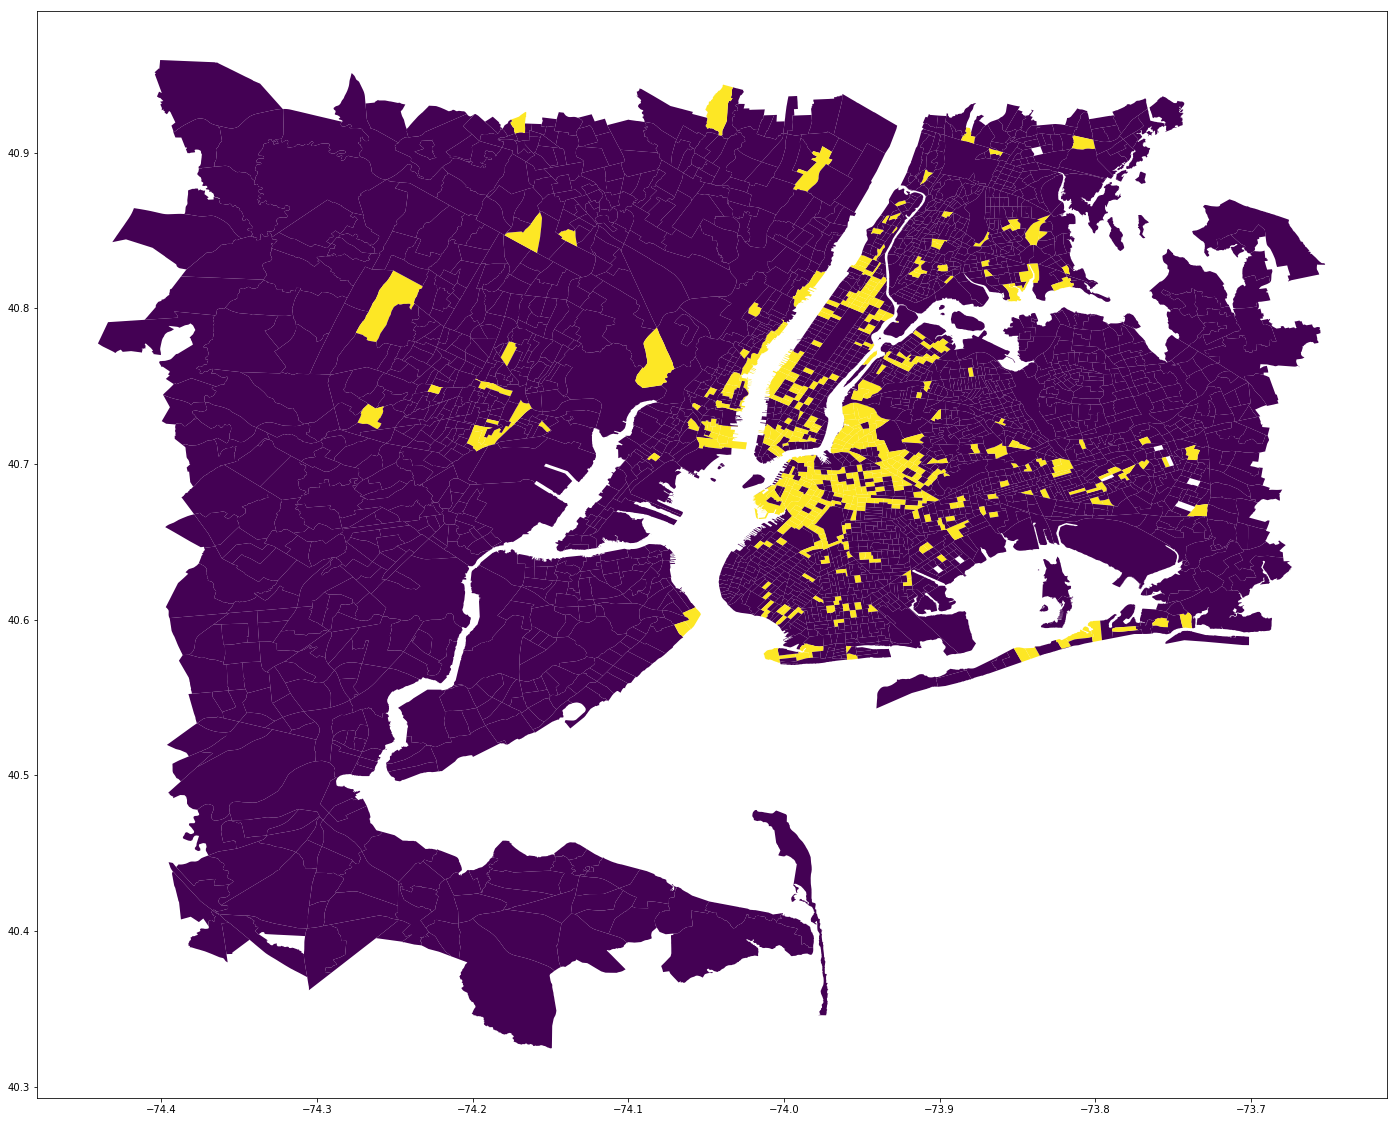

In [95]:
data_sjoined_sum_merged.plot(column='Typologies')

In [96]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'pct_ch_hinc00_16', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Typologies', 'geometry'],
      dtype='object', length=713)

# Part II. Modeling
### Analysis ## FOURSQUARE ONLY

In [97]:
# Neighbours
X_foursquare_neighbours = pd.read_csv('Improve_Features/X_foursquare-neighbours.csv')
print(X_foursquare_neighbours.shape,X_foursquare_neighbours.columns)
X_foursquare_neighbours.drop(['Unnamed: 0'],axis =1, inplace=True)
cols_neighbours = []
for column in X_foursquare_neighbours.columns:
    if '_sum10' in column:
        cols_neighbours.append(column)
cols_neighbours = cols_neighbours + ['GEOID']

(3009, 2130) Index(['Unnamed: 0', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Unknown_sum5', 'Category_Unknown_sum10', 'Class__sum5',
       'Class__sum10', 'Class_Necessary_sum5', 'Class_Necessary_sum10',
       'Class_Optional_sum5', 'Class_Optional_sum10', 'GEOID', 'geometry'],
      dtype='object', length=2130)


In [98]:
# Distances
X_foursquare_high = pd.read_csv('Improve_Features/X_foursquare-distances_high.csv')

print(X_foursquare_high.shape,X_foursquare_high.columns)
cols_high = []
for column in X_foursquare_high.columns:
    if 'distance' in column:
        cols_high.append(column)
cols_high = cols_high + ['GEOID']
cols_high

(3009, 724) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant', 'distance_to_Type_Café',
       'distance_to_Type_Wine Bar', 'distance_to_Type_Cocktail Bar',
       'distance_to_Type_Beer Garden'],
      dtype='object', length=724)


['distance_to_Type_American Restaurant',
 'distance_to_Type_Juice Bar',
 'distance_to_Type_Coffee Shop',
 'distance_to_Type_Deli / Bodega',
 'distance_to_Type_Food Truck',
 'distance_to_Type_Salad Place',
 'distance_to_Type_New American Restaurant',
 'distance_to_Type_Gastropub',
 'distance_to_Type_Steakhouse',
 'distance_to_Type_French Restaurant',
 'distance_to_Type_Café',
 'distance_to_Type_Wine Bar',
 'distance_to_Type_Cocktail Bar',
 'distance_to_Type_Beer Garden',
 'GEOID']

In [99]:
X_foursquare_low = pd.read_csv('Improve_Features/X_foursquare-distances_low.csv')
print(X_foursquare_low.shape,X_foursquare_low.columns)
cols_low = []
for column in X_foursquare_low.columns:
    if 'distance' in column:
        cols_low.append(column)
cols_low = cols_low + ['GEOID']
cols_low

(3009, 720) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Typologies', 'geometry', 'distance_to_Type_Latin American Restaurant',
       'distance_to_Type_Bar', 'distance_to_Type_Donut Shop',
       'distance_to_Type_Taco Place', 'distance_to_Type_Fast Food Restaurant',
       'distance_to_Type_Spanish Restaurant',
       'distance_to_Type_Fried Chicken Joint',
       'distance_to_Type_Caribbean Restaurant'],
      dtype='object', length=720)


['distance_to_Type_Latin American Restaurant',
 'distance_to_Type_Bar',
 'distance_to_Type_Donut Shop',
 'distance_to_Type_Taco Place',
 'distance_to_Type_Fast Food Restaurant',
 'distance_to_Type_Spanish Restaurant',
 'distance_to_Type_Fried Chicken Joint',
 'distance_to_Type_Caribbean Restaurant',
 'GEOID']

In [100]:
# Distances- numeric 
X_foursquare_numeric = pd.read_csv('Improve_Features/X_foursquare-distances_numeric.csv')
print(X_foursquare_numeric.shape,X_foursquare_numeric.columns)
cols_numeric = []
for column in X_foursquare_numeric.columns:
    if 'distance' in column:
        cols_numeric.append(column)
cols_numeric = cols_numeric + ['GEOID']
cols_numeric
# Distances- cats 
X_foursquare_cats1 = pd.read_csv('Improve_Features/X_foursquare-distances_cats.csv')
print(X_foursquare_cats1.shape,X_foursquare_cats1.columns)
cols_cats1 = []
for column in X_foursquare_cats1.columns:
    if 'distance' in column:
        cols_cats1.append(column)
cols_cats1 = cols_cats1 + ['GEOID']
cols_cats1
# Distances- class
X_foursquare_class = pd.read_csv('Improve_Features/X_foursquare-distances_class.csv')
print(X_foursquare_class.shape,X_foursquare_cats1.columns)
cols_class = []
for column in X_foursquare_class.columns:
    if 'distance' in column:
        cols_class.append(column)
cols_class = cols_class + ['GEOID']
cols_class

(3009, 716) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional',
       'Typologies', 'geometry', 'distance_to_Rating', 'distance_to_Checkins',
       'distance_to_Users', 'distance_to_Visits'],
      dtype='object', length=716)
(3009, 723) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'distance_to_Category_Consumption', 'distance_to_Category_Education',
       'distance_to_Category_Income', 'distance_to_Category_Leisure',
       'distance_to_Category_Mobility', 'distance_to_Category_Nutrition',
       'distance_to_Category_Personal care', 'distance_to_Category_Social',
       'distance_to_Category_Taking care', 'dista

['distance_to_Class_',
 'distance_to_Class_Necessary',
 'distance_to_Class_Optional',
 'GEOID']

In [118]:
X_foursquare_neighbours = X_foursquare_neighbours.loc[:,cols_neighbours]
X_foursquare_high = X_foursquare_high.loc[:,cols_high]
X_foursquare_class = X_foursquare_class.loc[:,cols_class]
X_foursquare_cats1 = X_foursquare_cats1.loc[:,cols_cats1]
X_foursquare_numeric = X_foursquare_numeric.loc[:,cols_numeric]
X_foursquare_low = X_foursquare_low.loc[:,cols_low]
# X_foursquare_person = X_foursquare_person.loc[:,cols_person]
# X_foursquare_income = X_foursquare_income.loc[:,cols_income]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [119]:
# X_foursquare = \
#     X_foursquare_neighbours.merge(X_foursquare_high.merge(X_foursquare_low.merge(X_foursquare_person.merge(X_foursquare_income,\
#                                                                         on='GEOID'),on='GEOID'),on='GEOID'), on = 'GEOID')
# print(X_foursquare_low.shape[1]+X_foursquare_high.shape[1]+X_foursquare_neighbours.shape[1])
# print(X_foursquare_low.shape,X_foursquare_high.shape,X_foursquare_neighbours.shape)
X_foursquare = X_foursquare_high.merge(X_foursquare_neighbours, on='GEOID')
X_foursquare = X_foursquare.merge(X_foursquare_low, on='GEOID')

X_foursquare = X_foursquare.merge(X_foursquare_numeric, on='GEOID')
X_foursquare = X_foursquare.merge(X_foursquare_cats1, on='GEOID')
X_foursquare.shape

(3009, 747)

In [120]:
X_foursquare = X_foursquare.merge(data_sjoined_sum_merged, on='GEOID')
X_foursquare['Latitutde'] = data_sjoined_sum_merged.geometry.centroid.x
X_foursquare['Longitude'] = data_sjoined_sum_merged.geometry.centroid.y


In [121]:
print(X_foursquare.shape)
X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(3009, 1461)
(3009, 1461)


In [122]:
### Preprocessing Data
### Preprocessing Data

# X_foursquare = data_sjoined_sum_merged.drop(['Typologies', 'geometry'],axis =1).copy()
y = X_foursquare.Typologies
X_foursquare = X_foursquare.drop(['Typologies','GEOID'],axis =1).copy()
## change to zeros

# replace with mean/median

# create a new

print(X_foursquare.shape)
# X_foursquare.replace(False,0,inplace=True)
# X_foursquare.replace('FALSE',0,inplace=True)
# X_foursquare.replace('#NULL!',0,inplace=True)
# X_foursquare.replace(nan,0,inplace=True)

X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(3009, 1459)
(3009, 1459)


In [123]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_foursquare, y, test_size = 0.3, random_state = 1)    

In [124]:
X_foursquare = X_foursquare.drop(['geometry'],axis =1).copy()

X_foursquare.columns

Index(['distance_to_Type_American Restaurant', 'distance_to_Type_Juice Bar',
       'distance_to_Type_Coffee Shop', 'distance_to_Type_Deli / Bodega',
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Latitutde', 'Longitude'],
      dtype='object', length=1458)

In [125]:
# Normalize
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

models = ['original','scaled','minmaxed']
Xdata_scaled = preprocessing.scale(X_foursquare)
# ydata_scaled = preprocessing.scale(y)

Xdata_minmaxed = min_max_scaler.fit_transform(X_foursquare)
# ydata_minmaxed = min_max_scaler.fit_transform(y)

dictx = {}
dictx['original'] = X_foursquare
dictx['scaled'] = Xdata_scaled
dictx['minmaxed'] = Xdata_minmaxed
                    

# x = dictx[model][0]
# y = dictx[model][1]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [126]:
model = {}
model_f1_scores = {}
model_recall_scores = {}
model_precision_scores = {}

model = {}
modelslist = ['Logit','DT','RF','SVM'] 
for m in models:
    # X_train[m], X_test[m], y_train[m], y_test[m]
    dictx[m]
    model[m] = {}
    model_f1_scores[m] = {}
    model_recall_scores[m] ={}
    model_precision_scores[m] = {}
resultset=data_sjoined_sum_merged.copy()

In [127]:
from sklearn.model_selection import train_test_split

X_train = {}
X_test = {}
y_train = {}
y_test = {}
for m in models:

    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(dictx[m], y, test_size = 0.3, random_state = 1)    
    #x >> dictx[m][0]
    # y =>> dictx[m][1]
    print(X_train[m].shape, X_test[m].shape, y_train[m].shape, y_test[m].shape)

(2106, 1458) (903, 1458) (2106,) (903,)
(2106, 1458) (903, 1458) (2106,) (903,)
(2106, 1458) (903, 1458) (2106,) (903,)


# LR

In [128]:
## Logistic Reeg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab

for m in models:
#     dictx[m]
#     model[m]
# X_train[m], X_test[m], y_train[m], y_test[m]
    logit_1 = LogisticRegression(C = 10000)
#     print(X_train[m].shape,y_train[m].shape)
    logit_1.fit(X_train[m], y_train[m])
#     print(logit_1.score(X_test[m],y_test[m]))
    model[m]['Logit'] = logit_1.score(X_test[m],y_test[m])
    resultset[m+'_Logit_predicttyp']=logit_1.predict(dictx[m])
    y_pred = logit_1.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['Logit'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['Logit'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['Logit'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'minmaxed': {'Logit': 0.45421245421245415},
 'original': {'Logit': 0.092715231788079458},
 'scaled': {'Logit': 0.44108761329305135}}

# DT

In [129]:
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
for m in models:
    #     dictx[m]
    #     model[m]
    param_grid = {'max_depth':range(1,11),'max_leaf_nodes':range(2,11)}
    dt=DecisionTreeClassifier()
    gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
    ds=gr.fit(X_train[m],y_train[m])
    print (ds.best_params_)

    print(gr.score(X_test[m],y_test[m]))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'max_depth': 4}
0.939091915836


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'max_depth': 4}
0.939091915836


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'max_depth': 4}
0.939091915836


In [130]:
seed = 5
# print(y_train.shape, X_train.shape)
for m in models:
    #     dictx[m]
    #     model[m]

    OS = []
    for c in range(5):

        dt=DecisionTreeClassifier()


        dt = DecisionTreeClassifier(max_depth=ds.best_params_['max_depth'],max_leaf_nodes=ds.best_params_['max_leaf_nodes'])
        dt.fit(X_train[m], y_train[m])
        pred=dt.predict_proba(X_test[m])[:,1]
        OS.append(dt.score(X_test[m],y_test[m]))

    print(dt.score(X_test[m],y_test[m]))
    model[m]['DT'] = mean(OS)
    resultset[m+'_DT_predicttyp']=dt.predict(dictx[m])
    y_pred = dt.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['DT'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['DT'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['DT'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores

0.939091915836
0.939091915836
0.939091915836


{'minmaxed': {'DT': 0.78764478764478763, 'Logit': 0.45421245421245415},
 'original': {'DT': 0.78764478764478763, 'Logit': 0.092715231788079458},
 'scaled': {'DT': 0.78764478764478763, 'Logit': 0.44108761329305135}}

In [131]:
print(m)
list(dt.predict(X_test[m]))

minmaxed


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,


In [132]:
resultset=data_sjoined_sum_merged
resultset['predicttyp']=dt.predict(X_foursquare)

In [133]:
resultset['predicttyp2']=gr.predict(X_foursquare)

In [134]:
resultset['actualtyp']=data_sjoined_sum_merged.Typologies

# Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
def featureImportancePlot(rf, labels):
    '''plots feature importance for random forest
    rf: the random forest model fit to the data
    labels: the names of the features
    '''
    
    importances = rf.feature_importances_[:10]
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

    pl.figure()
    pl.title("Feature importances")
    pl.bar(range(indices.shape[0]), rf.feature_importances_[indices],
       color="SteelBlue", yerr=std[indices], align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()


original


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 7, 'max_depth': 8, 'n_estimators': 2}
0.854928017719
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.858250276855


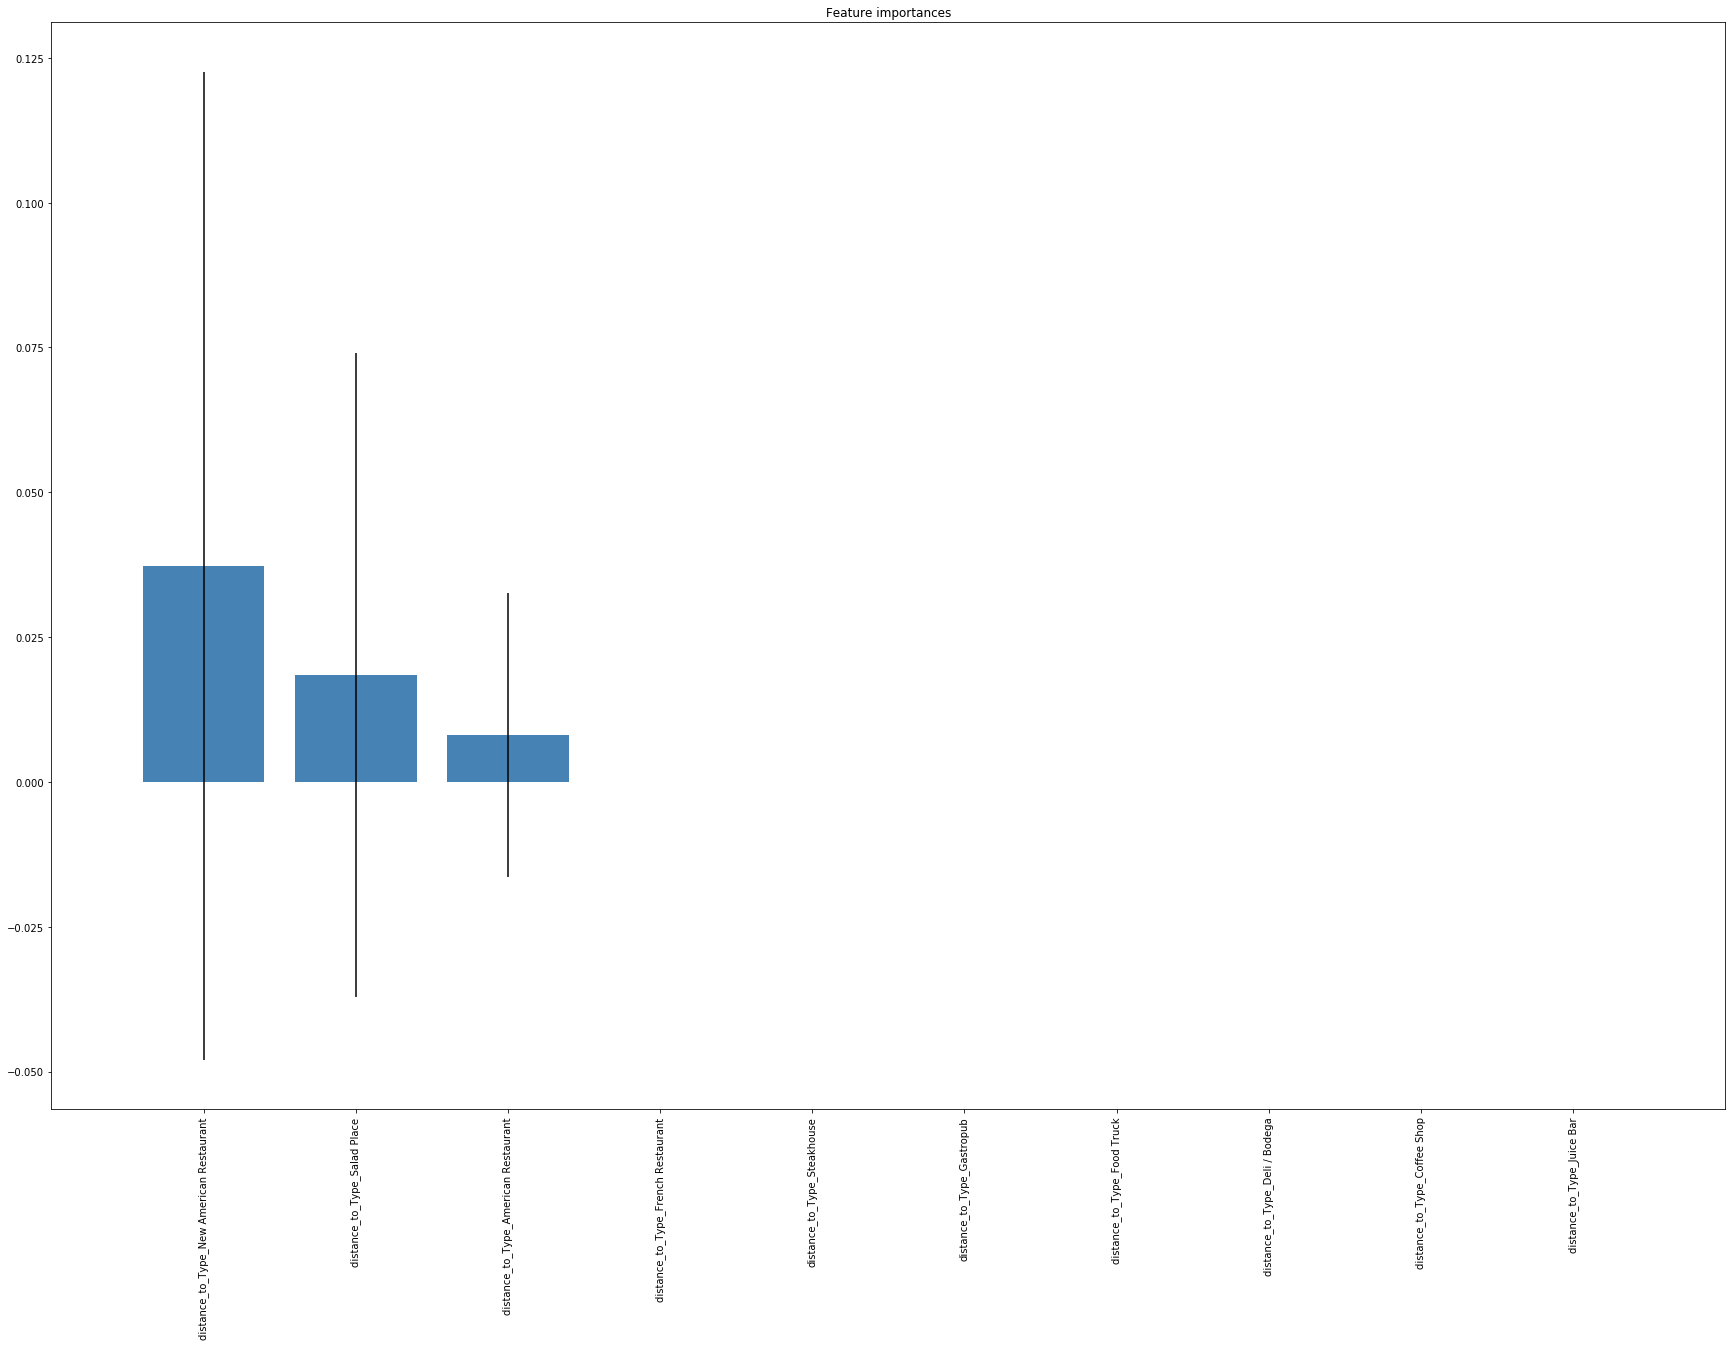

scaled


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'max_depth': 9, 'n_estimators': 3}
0.860465116279
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.888150609081


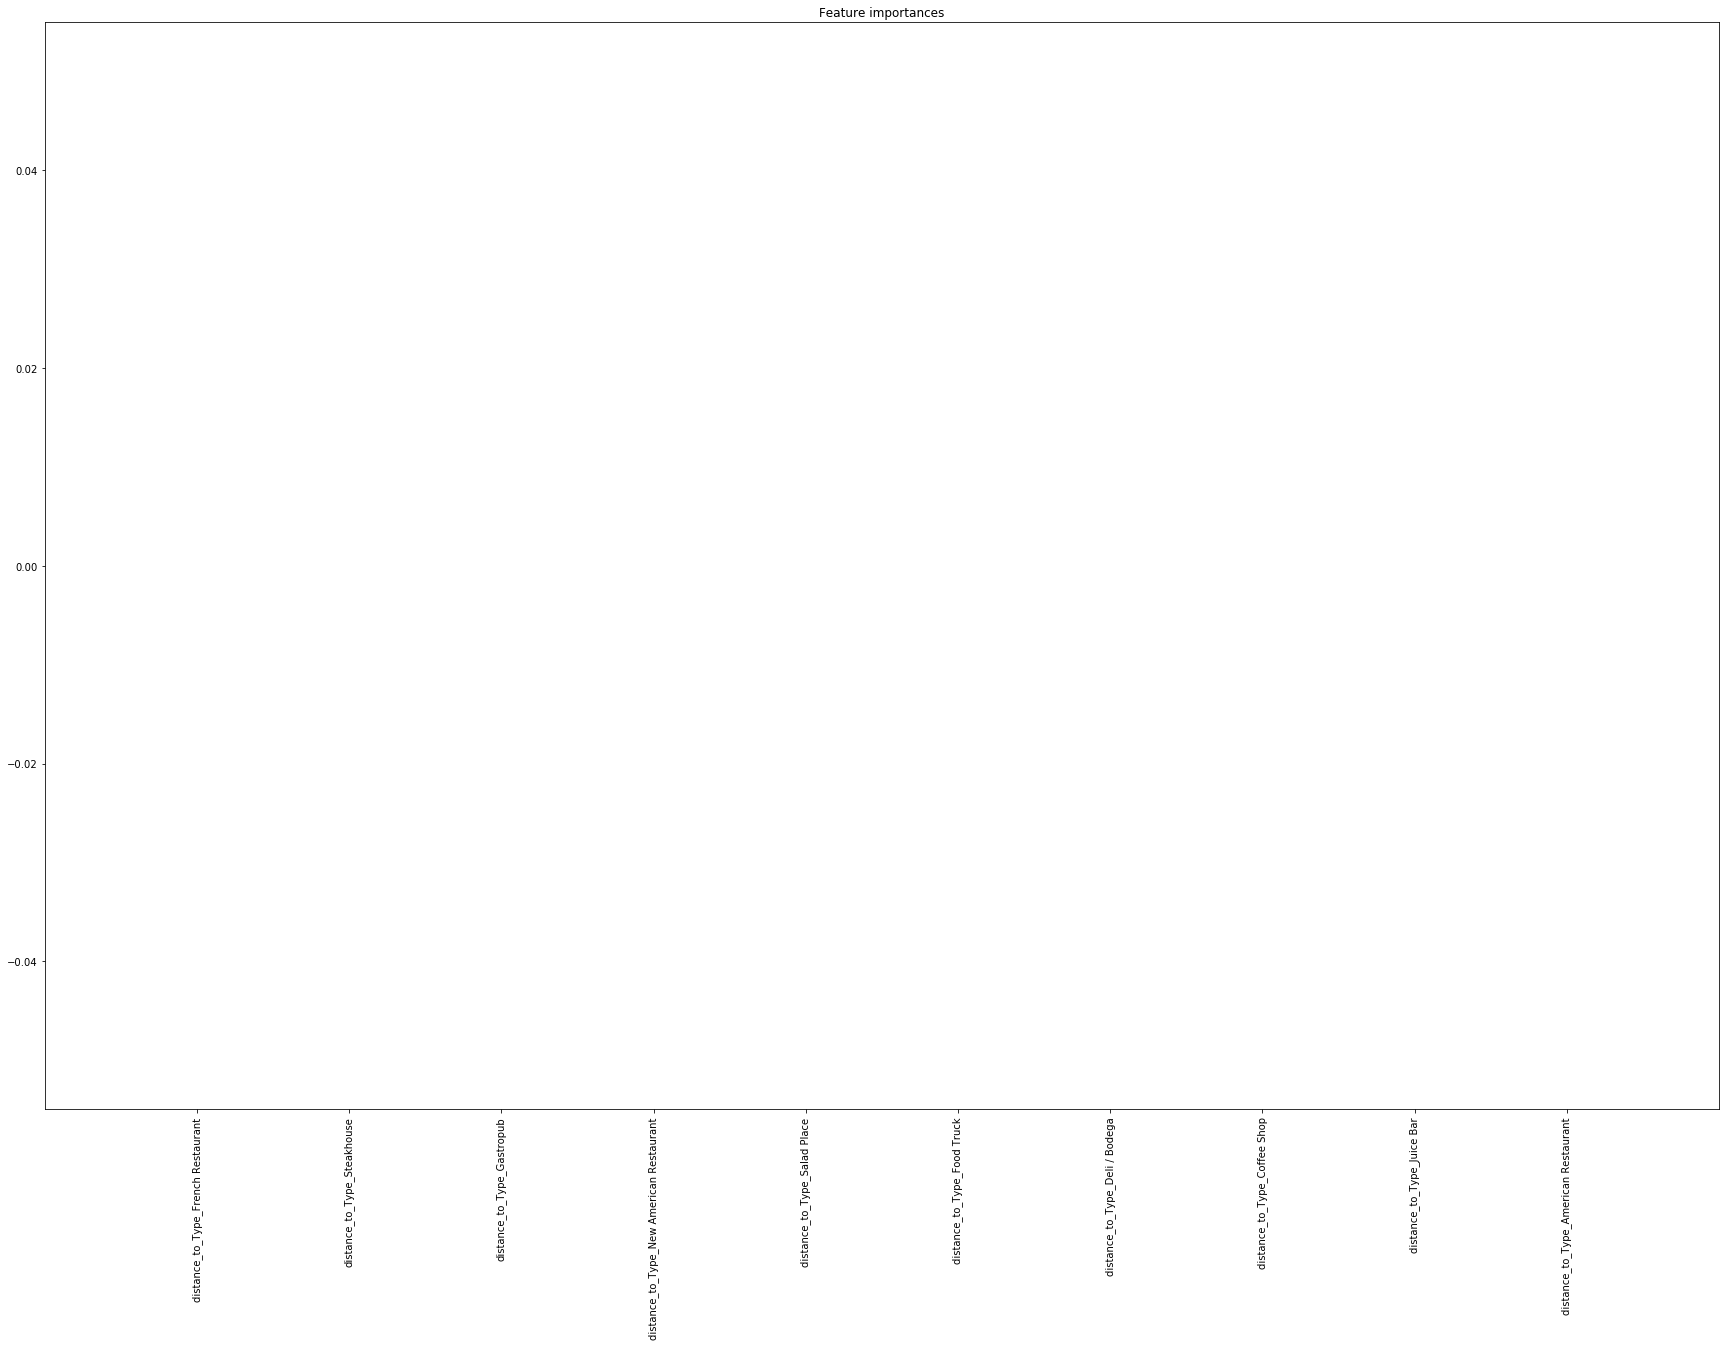

minmaxed


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 6, 'max_depth': 2, 'n_estimators': 2}
0.862679955703
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.875968992248


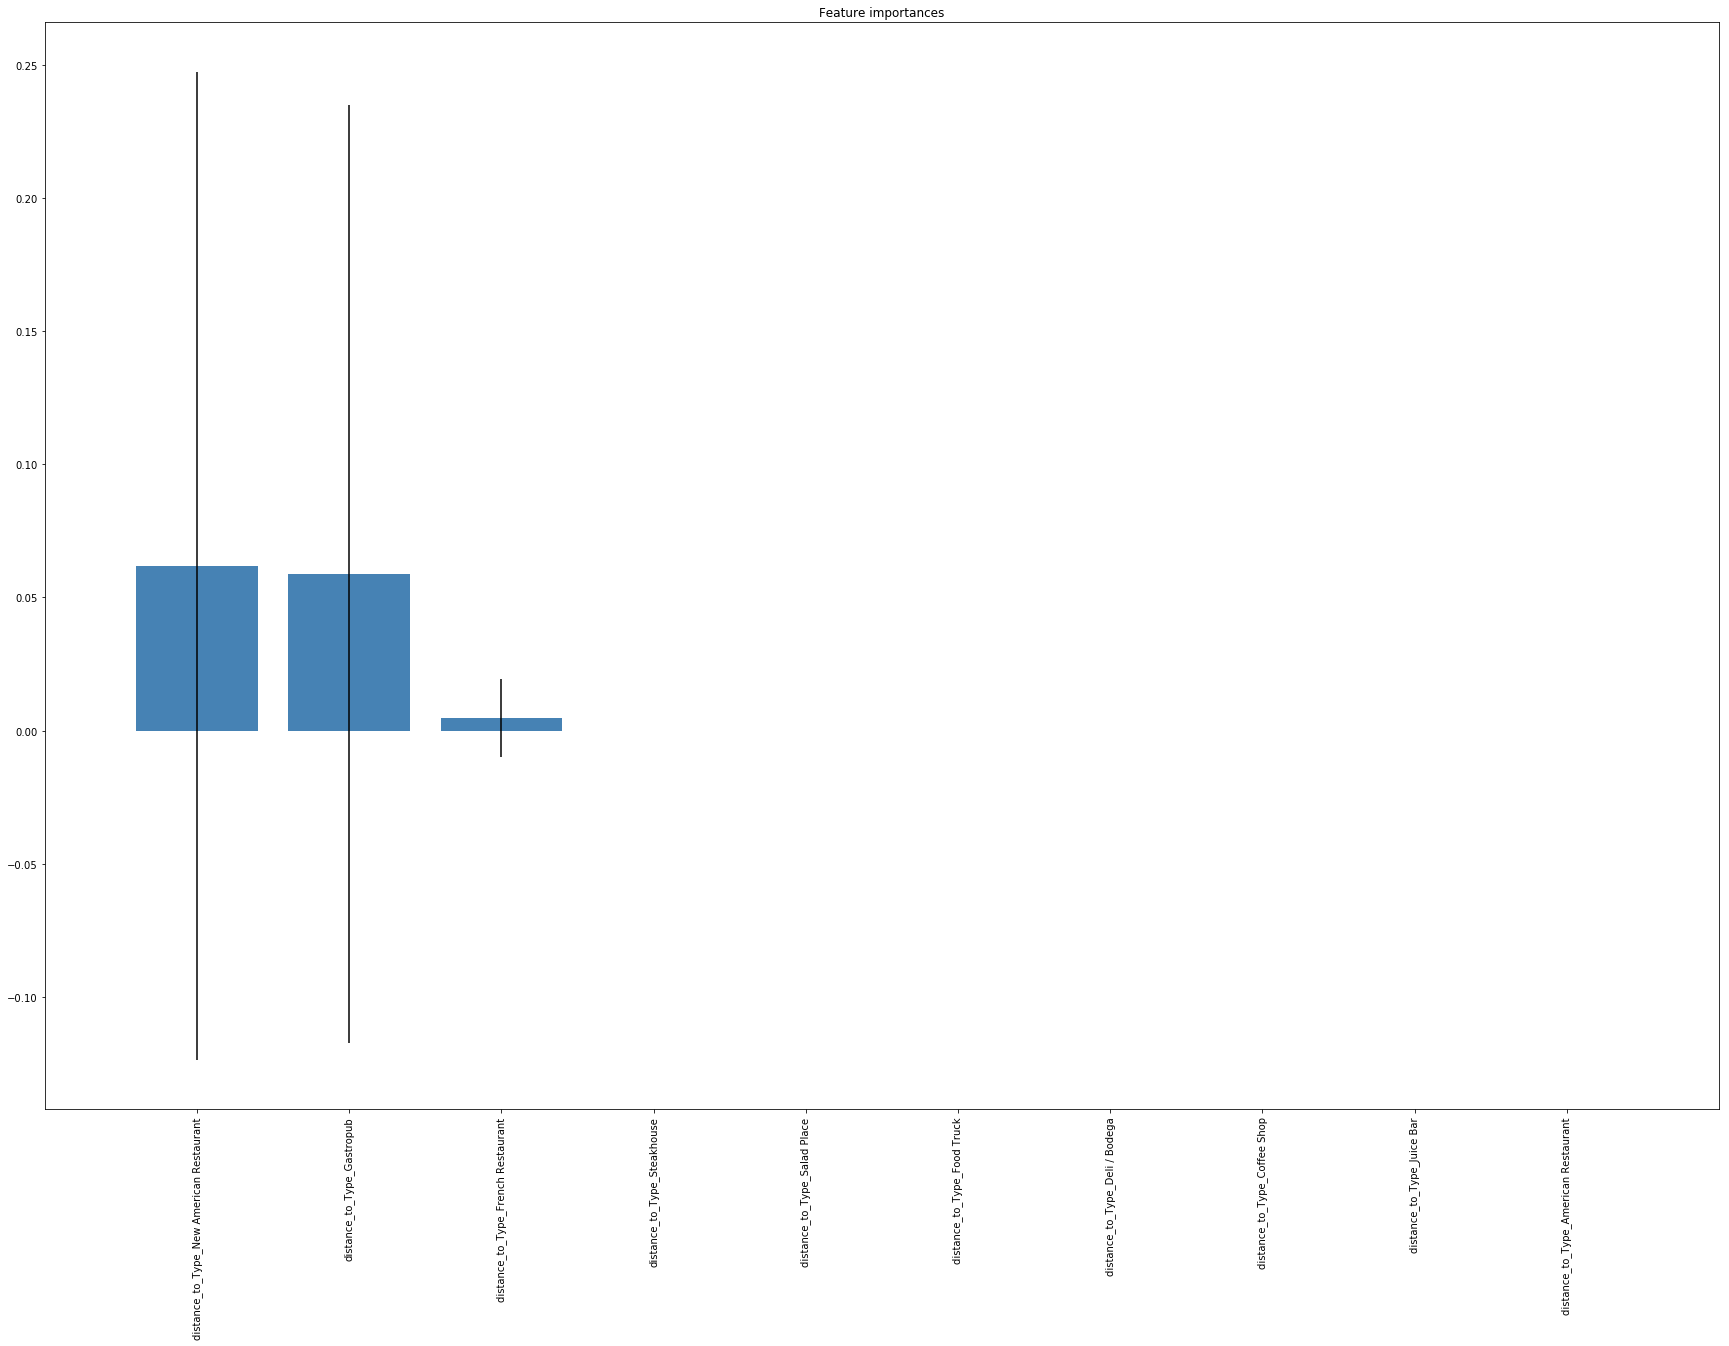

{'minmaxed': {'DT': 0.78764478764478763,
  'Logit': 0.45421245421245415,
  'RF': 0.36363636363636365},
 'original': {'DT': 0.78764478764478763,
  'Logit': 0.092715231788079458,
  'RF': 0.14666666666666667},
 'scaled': {'DT': 0.78764478764478763,
  'Logit': 0.44108761329305135,
  'RF': 0.44808743169398901}}

In [136]:
for m in models:
    #     dictx[m]
    print(m)
    param_grid = {'max_depth':range(1,11),'n_estimators':range(1,11),'max_leaf_nodes':range(2,11)}
    rf=RandomForestClassifier()
    gr=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rs=gr.fit(X_train[m],y_train[m])
    print (rs.best_params_)
    print(gr.score(X_test[m],y_test[m]))
    OS = []
    print("i am here")
    for c in range(5):
        rf=RandomForestClassifier()
        rf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
        rf.fit(X_train[m], y_train[m])
        pred=rf.predict_proba(X_test[m])[:,1]
        OS.append(rf.score(X_test[m],y_test[m]))
    print(rf.score(X_test[m],y_test[m]))
    model[m]['RF'] = mean(OS)
    featureImportancePlot(rf, X_foursquare.columns)
    resultset[m+'_RF_predicttyp']=rf.predict(dictx[m])
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['RF'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['RF'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['RF'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores


#### Note that the features have changed considerably with the updated binary typology-- users and checkins were the most important features initially.

# SVM

In [137]:
from sklearn.model_selection import GridSearchCV

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
# param_grid = {'kernel':['linear'],'C':[np.exp(i) for i in np.linspace(-10,10,10)]}
for m in models:
    OS = []
    #     dictx[m]
        #     model[m]
    rr = svm.SVC(gamma='auto')
    rr.fit(X_train[m], y_train[m])
    correct=1.0*(rr.predict(X_test[m])==np.asarray(y_test[m])).sum()/len(y_test[m])
    print(correct)
    print(rr.score(X_test[m],y_test[m]))
    OS.append(correct)
    resultset[m+'_SVM_predicttyp']=rr.predict(dictx[m])
    model[m]['SVM'] = mean(OS)
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['SVM'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['SVM'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['SVM'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
model

0.852713178295
0.852713178295
0.856035437431
0.856035437431
0.852713178295
0.852713178295


{'minmaxed': {'DT': 0.93909191583610185,
  'Logit': 0.83499446290143964,
  'RF': 0.86998892580287934,
  'SVM': 0.8527131782945736},
 'original': {'DT': 0.93909191583610185,
  'Logit': 0.84828349944629011,
  'RF': 0.87065337763012196,
  'SVM': 0.8527131782945736},
 'scaled': {'DT': 0.93909191583610185,
  'Logit': 0.7951273532668881,
  'RF': 0.87818383167220371,
  'SVM': 0.85603543743078625}}

In [138]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model[m][i])
    print('-----------------------------------------------------')

original
Logit
0.848283499446
DT
0.939091915836
RF
0.87065337763
SVM
0.852713178295
-----------------------------------------------------
scaled
Logit
0.795127353267
DT
0.939091915836
RF
0.878183831672
SVM
0.856035437431
-----------------------------------------------------
minmaxed
Logit
0.834994462901
DT
0.939091915836
RF
0.869988925803
SVM
0.852713178295
-----------------------------------------------------


In [145]:

for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_f1_scores[m][i])
    print('-----------------------------------------------------')
    print(model_f1_scores[m].keys(), model_f1_scores[m].values())
model_f1_scores.keys(), model_f1_scores.values()
pd.DataFrame(model_f1_scores)

original
Logit
0.0927152317881
DT
0.787644787645
RF
0.146666666667
SVM
0.324022346369
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.14666666666666667, 0.32402234636871508, 0.78764478764478763, 0.092715231788079458])
scaled
Logit
0.441087613293
DT
0.787644787645
RF
0.448087431694
SVM
0.198675496689
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.44808743169398901, 0.19867549668874168, 0.78764478764478763, 0.44108761329305135])
minmaxed
Logit
0.454212454212
DT
0.787644787645
RF
0.363636363636
SVM
0.363636363636
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.36363636363636365, 0.36363636363636365, 0.78764478764478763, 0.45421245421245415])


,minmaxed,original,scaled
DT,0.787645,0.787645,0.787645
Logit,0.454212,0.092715,0.441088
RF,0.363636,0.146667,0.448087
SVM,0.363636,0.324022,0.198675


In [140]:

for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_recall_scores[m][i])
    print('-----------------------------------------------------')
    print(model_recall_scores[m].keys(), model_recall_scores[m].values())
model_recall_scores.keys(), model_recall_scores.values()


original
Logit
0.0526315789474
DT
0.766917293233
RF
0.0827067669173
SVM
0.218045112782
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.082706766917293228, 0.21804511278195488, 0.76691729323308266, 0.052631578947368418])
scaled
Logit
0.548872180451
DT
0.766917293233
RF
0.308270676692
SVM
0.112781954887
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.30827067669172931, 0.11278195488721804, 0.76691729323308266, 0.54887218045112784])
minmaxed
Logit
0.466165413534
DT
0.766917293233
RF
0.240601503759
SVM
0.240601503759
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.24060150375939848, 0.24060150375939848, 0.76691729323308266, 0.46616541353383456])


(dict_keys(['original', 'minmaxed', 'scaled']),
 dict_values([{'RF': 0.082706766917293228, 'SVM': 0.21804511278195488, 'DT': 0.76691729323308266, 'Logit': 0.052631578947368418}, {'RF': 0.24060150375939848, 'SVM': 0.24060150375939848, 'DT': 0.76691729323308266, 'Logit': 0.46616541353383456}, {'RF': 0.30827067669172931, 'SVM': 0.11278195488721804, 'DT': 0.76691729323308266, 'Logit': 0.54887218045112784}]))

In [141]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_precision_scores[m][i])
    print(model_precision_scores[m].keys(), model_precision_scores[m].values())
    print('-----------------------------------------------------')


original
Logit
0.388888888889
DT
0.809523809524
RF
0.647058823529
SVM
0.630434782609
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.6470588235294118, 0.63043478260869568, 0.80952380952380953, 0.3888888888888889])
-----------------------------------------------------
scaled
Logit
0.368686868687
DT
0.809523809524
RF
0.82
SVM
0.833333333333
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.81999999999999995, 0.83333333333333337, 0.80952380952380953, 0.36868686868686867])
-----------------------------------------------------
minmaxed
Logit
0.442857142857
DT
0.809523809524
RF
0.744186046512
SVM
0.744186046512
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.7441860465116279, 0.7441860465116279, 0.80952380952380953, 0.44285714285714284])
-----------------------------------------------------


- You can refer to https://github.com/mv1742/updny_2

## Results Analysis

In [142]:
print(m)
resultset.columns

minmaxed


Index(['GEOID', 'pct_ch_hinc00_16', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'geometry', 'predicttyp', 'predicttyp2', 'actualtyp',
       'original_RF_predicttyp', 'scaled_RF_predicttyp',
       'minmaxed_RF_predicttyp', 'original_SVM_predicttyp',
       'scaled_SVM_predicttyp', 'minmaxed_SVM_predicttyp'],
      dtype='object', length=722)

The plots below show the number of positive (gentrifying, 1) and negative (not-gentrifying, 0) typologies based on the actual typology labels and the predicted labels from each model.

False    2569
True      440
Name: actualtyp, dtype: int64

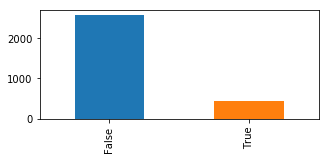

In [143]:
resultset['actualtyp'].value_counts().plot(kind='bar', figsize=(5,2))
resultset['actualtyp'].value_counts()

In [144]:
for m in models:
    for i in modelslist:
        resultset[m+'_'+i+'_predicttyp'].value_counts().plot(kind='bar',figsize=(5,2))
        plt.show()
        print(resultset[m+'_'+i+'_predicttyp'].value_counts())

KeyError: 'original_Logit_predicttyp'

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(resultset.actualtyp, resultset.original_RF_predicttyp)

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

Below you can see that logit produces 30 positive results (19 true and 11 false), while random forest produces only 1 positive (it is true).

In [ ]:
perf_measure(resultset.actualtyp, resultset.original_DT_predicttyp)

In [ ]:
perf_measure(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

In [ ]:
resultsfull=data_sjoined_sum_merged.merge(resultset[["scaled_Logit_predicttyp"]], right_index=True, left_index=True)

In [ ]:
resultsfull.head()

In [ ]:
def set_resulttyp(row):
    if row["actualtyp"] == 0:
        if row["scaled_Logit_predicttyp"] == 0:
            return "TN"
        elif row["scaled_Logit_predicttyp"] == 1: 
            return "FP" 
    elif row["actualtyp"] == 1:
        if row["scaled_Logit_predicttyp"] == 1:
            return "TP"
        elif  row["scaled_Logit_predicttyp"] == 0:
            return "FN"

#df = df.assign(color=df.apply(set_color, axis=1))

In [ ]:
resultsfinal=resultsfull.assign(logitresulttyp=resultset.apply(set_resulttyp, axis=1))

In [ ]:
f, ax = plt.subplots(figsize=(16,16))
resultsfinal.plot(column='logitresulttyp', ax=ax, legend=True)

The only positive results for the logit model (whether true or false positive) fell in the NYC and Jersey City areas-- no outer borough or other NJ/CT/NY tracts were picked up. 